# SVM for classification

Load IRIS dataset, check its contents:


In [96]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [97]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [98]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [99]:
X=iris.data[iris.target < 2, 0:2]
y=iris.target[iris.target < 2]
# X=iris.data[:, 0:2]
# y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

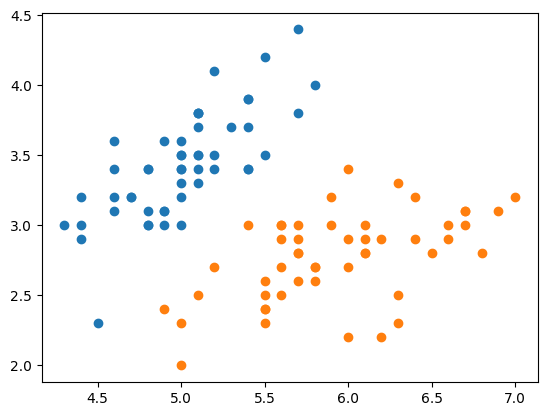

In [100]:
import matplotlib.pyplot as plt 

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
# plt.scatter(X[y==2, 0], X[y==2, 1])

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [101]:
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train, y_train)
SVMmodel.get_params()
SVMmodel.score(X_test, y_test)

0.95

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

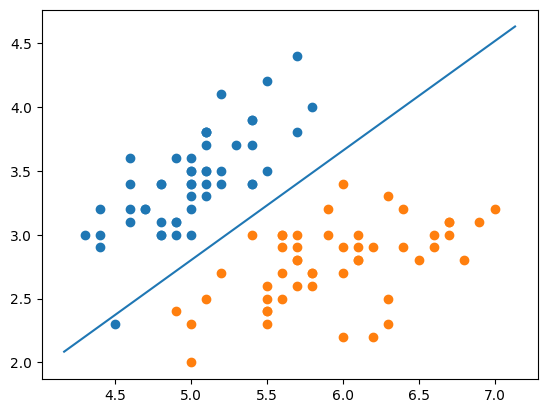

In [102]:
import numpy as np

supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
# plt.scatter(X[y==2, 0], X[y==2, 1])
# plt.scatter(supvectors[:,0], supvectors[:,1], color="red")
x0, x1 = plt.xlim()
y0, y1 = plt.ylim()
x = np.linspace(*plt.xlim())
line = np.outer(W[0], x)
plt.plot(x, -(W[0, 0]/W[0, 1])*x-(b/W[0, 1]))



# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

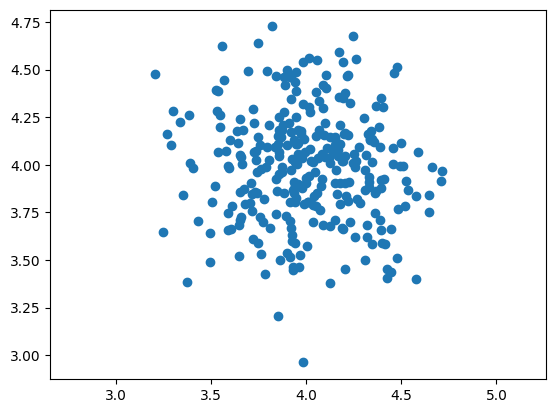

In [103]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))
x_test, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.axis('equal')
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

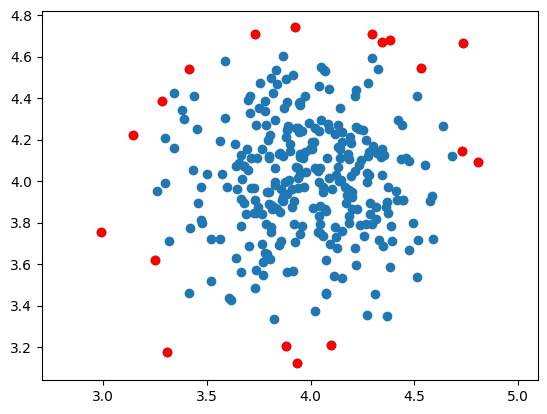

In [104]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x_test)
anom_index = where(pred==-1)
values = x_test[anom_index]

plt.scatter(x_test[:,0], x_test[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

[[3.85463046 3.20400443]
 [4.24554653 4.67363469]
 [3.20576064 4.47847741]
 [4.47941497 4.51111655]
 [3.82382713 4.72625839]
 [3.3759303  3.38448149]
 [3.98286354 2.96191517]
 [3.55773919 4.62591332]
 [4.71389792 3.96511489]
 [4.57987163 3.40192854]]


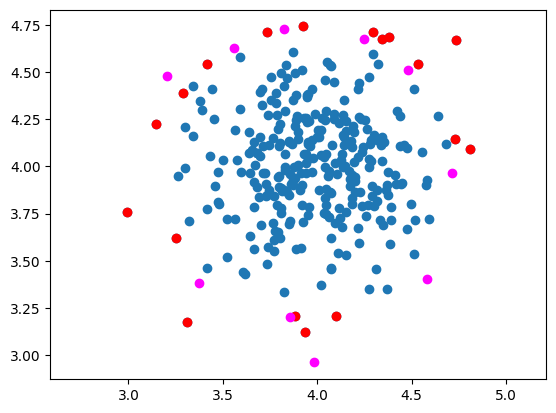

In [105]:
supOne=SVMmodelOne.support_vectors_
print(supOne)
plt.scatter(x_test[:,0], x_test[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.scatter(supOne[:,0], supOne[:,1], color='magenta')
plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.988487756666386


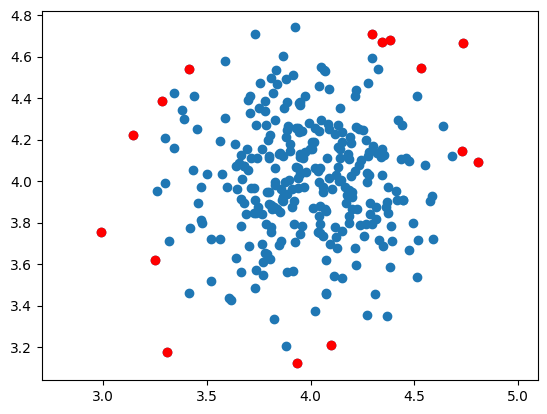

In [106]:
scores = SVMmodelOne.score_samples(x_test)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x_test[index]

plt.scatter(x_test[:,0], x_test[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()